### 1. One Hot Encoding

In [ ]:
corpus = ["i love nlp", "i teach gen ai", "i am working with euron"]

In [ ]:
set(" ".join(corpus).split())

{'ai', 'am', 'euron', 'gen', 'i', 'love', 'nlp', 'teach', 'with', 'working'}

In [ ]:
unique_words = list(set(" ".join(corpus).split()))

In [ ]:
unique_words

['gen', 'euron', 'with', 'working', 'ai', 'nlp', 'teach', 'i', 'am', 'love']

In [ ]:
for i in enumerate(unique_words):
  print(i)

(0, 'gen')
(1, 'euron')
(2, 'with')
(3, 'working')
(4, 'ai')
(5, 'nlp')
(6, 'teach')
(7, 'i')
(8, 'am')
(9, 'love')


In [ ]:
word_to_index = {word:i for i,word in enumerate(unique_words)} #key - value pairs

In [ ]:
one_hot_vector = []
for sentence in corpus:
  print(sentence)
  sentence_vector = []
  for word in sentence.split():
    vector = [0] * len(unique_words) # initializing a zero vector
    print(vector)
    vector[word_to_index[word]] = 1
    # print(word_to_index[word])
    # print(vector[word_to_index[word]])
    sentence_vector.append(vector)
  one_hot_vector.append(sentence_vector)



i love nlp
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
i teach gen ai
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
i am working with euron
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
one_hot_vector

[[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]]

**Cons of using One Hot Encoding:**
- Even for a very small dataset ie. for 3 words it created a 3x10 space of matrices. If we have a very large unique words the vector size increases significantly.
- A lot of space(0,0) data we can find out.
- There is no where it's building a relationship between the words (no understanding of the context)

### 2. BOW (Bag of Words)
- A frequency based encoding technique where whatever sentence/document that we take will be represented in a vector space.
- vector length = total no. of unique words
- The value in each position represents the no. of times the word appears in the particular sentence.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(stop_words=None, vocabulary=unique_words)

In [ ]:
corpus = ["i love nlp", "i teach gen ai", "i am working with euron", "i am with india"]

In [ ]:
X = vectorizer.fit_transform(corpus)

In [ ]:
X.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
vectorizer.get_feature_names_out()

array(['gen', 'euron', 'with', 'working', 'ai', 'nlp', 'teach', 'i', 'am',
       'love'], dtype=object)

### TF-IDF (Term Frequency - Inverse Document Frequency)

- TF = (no. of times word appeared in a document) / Total number of word in document
- IDF = log([Total number of document]/No. of doc containing word)

= TF-IDF = TF x IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect_tf_idf = TfidfVectorizer()

In [ ]:
corpus = ["i love nlp", "i teach gen ai", "i am working with euron"]

In [ ]:
X = vect_tf_idf.fit_transform(corpus)
X.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.70710678, 0.        , 0.        , 0.        ],
       [0.57735027, 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.5       ]])

Advantages:
- If frequency of occurence is very very high, it will automatically reduce the impact of those words.
- If it's unique it's going to assign a large value if it's frequently occuring then it will assign a small value for that word.
- Less sparse compared to other methods

### Word2Vec

In [ ]:
 !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
!pip install --upgrade --force-reinstall numpy matplotlib gensim scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.2 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.9 MB/s eta 0:00:00
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 14.9 MB/s eta 0:00:00
   

In [ ]:
!pip install nltk

^C


In [ ]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re # regular expression

In [ ]:
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
corpus = [
    "my name is Harish Nandhan",
    "i use to teach all the data stack along with ops and cloud !",
    "fsfs dasjkdfnafkd adjnadfnm 2634 #$#!Q₹@4 ,",
    "nlp is very very amazing",
    "we are trying to learn word2vec",
    "we will try to build two models for word 2 vec cbow and skipgram",
    "we will also work on cleaning the data which is basically a part of data preprocessing",
    "natural language processing is a part of AI,",
    "my phone number is 234 w342 324324",
    "word 2 vec is being used for word embeddings",
    "it is going to perform better then one hot, bow or TF-IDF"
]

preprocessing
1. Lowercasing

In [ ]:
s = "my name is Harish Nandhan 62w36 823."
s.lower()
re.sub(r'\d+',"",s)

'my name is Harish Nandhan w .'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
s.translate(str.maketrans("","",string.punctuation))

'my name is Harish Nandhan 62w36 823'

In [ ]:
word_tokenize(s)

['my', 'name', 'is', 'Harish', 'Nandhan', '62w36', '823', '.']

In [ ]:
s1 = ['my', 'name', 'is', 'Harish', 'Nandhan', '62w36', '823', '.']

In [ ]:
[ i for i in s1 if i not in stopwords.words('english')]

['name', 'Harish', 'Nandhan', '62w36', '823', '.']

In [ ]:
def word_preprocessing(text):
  text = text.lower() # lower casing
  text = re.sub(r'\d+',"",text) # remove all the numerical values
  text = text.translate(str.maketrans("","",string.punctuation)) # removing the punctuation
  word = word_tokenize(text) # tokenization
  word = [i for i in word if i not in stopwords.words('english')] # removing the stopwords
  return word

In [ ]:
corpus = [
    "my name is Harish Nandhan",
    "i use to teach all the data stack along with ops and cloud !",
    "fsfs dasjkdfnafkd adjnadfnm 2634 #$#!Q₹@4 ,",
    "nlp is very very amazing",
    "we are trying to learn word2vec",
    "we will try to build two models for word 2 vec cbow and skipgram",
    "we will also work on cleaning the data which is basically a part of data preprocessing",
    "natural language processing is a part of AI,",
    "my phone number is 234 w342 324324",
    "word 2 vec is being used for word embeddings",
    "it is going to perform better then one hot, bow or TF-IDF"
]
preprocessed_corpus = []
for sentence in corpus:
  preprocessed_corpus.append(word_preprocessing(sentence))

In [ ]:
preprocessed_corpus

[['name', 'harish', 'nandhan'],
 ['use', 'teach', 'data', 'stack', 'along', 'ops', 'cloud'],
 ['fsfs', 'dasjkdfnafkd', 'adjnadfnm', 'q₹'],
 ['nlp', 'amazing'],
 ['trying', 'learn', 'wordvec'],
 ['try', 'build', 'two', 'models', 'word', 'vec', 'cbow', 'skipgram'],
 ['also',
  'work',
  'cleaning',
  'data',
  'basically',
  'part',
  'data',
  'preprocessing'],
 ['natural', 'language', 'processing', 'part', 'ai'],
 ['phone', 'number', 'w'],
 ['word', 'vec', 'used', 'word', 'embeddings'],
 ['going', 'perform', 'better', 'one', 'hot', 'bow', 'tfidf']]

In [ ]:
word2vec_cbow = Word2Vec(sentences=preprocessed_corpus,vector_size=100,window=5, min_count=1,sg=0)
word2vec_skipgram = Word2Vec(sentences=preprocessed_corpus,vector_size=100,window=5, min_count=1,sg=1)
# window -> maximum distance between the target word and the context word
# if window size is larger more semantic relationship (grammar) , if smaller then to learn syntactic (order) of the word.

In [ ]:
word2vec_cbow.wv['harish']

array([-0.0025059 , -0.00590359,  0.00748347, -0.00725998, -0.00896659,
       -0.00178924, -0.00836577,  0.00039025,  0.00194543, -0.00247019,
       -0.00644696, -0.00032104, -0.00109656,  0.00349364,  0.0081264 ,
        0.00585743,  0.00844373, -0.00896954,  0.00944315, -0.00236901,
        0.0086977 ,  0.00238394,  0.00358888, -0.00958221, -0.0094851 ,
        0.00898416, -0.00289762,  0.00281721,  0.00641923, -0.00029882,
        0.00972277, -0.00103211, -0.00967024, -0.00705649, -0.0010435 ,
       -0.00867459,  0.00742109,  0.00361832, -0.00874977,  0.00847851,
        0.00892784,  0.0058483 ,  0.00690927, -0.00957105,  0.00049218,
       -0.00922169, -0.00366774,  0.0002524 , -0.00028176,  0.00146754,
        0.00327611,  0.00212618,  0.00531667,  0.00752064, -0.00588621,
        0.00795524,  0.00599017,  0.00978553,  0.0046218 , -0.00332569,
       -0.00374672, -0.00063091, -0.00165416,  0.00987365,  0.00112082,
        0.00400765,  0.00341644, -0.00885249,  0.00672092,  0.00

In [ ]:
word2vec_skipgram.vector_size

100

In [ ]:
len(word2vec_cbow.wv['harish'])

100

In [ ]:
word2vec_skipgram.wv.most_similar('harish',topn=3)

[('language', 0.22200626134872437),
 ('adjnadfnm', 0.1714509278535843),
 ('use', 0.15663227438926697)]

In [ ]:
word2vec_cbow.wv.similarity("nlp","ai")

0.24757281

In [ ]:
word2vec_cbow.wv.index_to_key

['data',
 'word',
 'vec',
 'part',
 'q₹',
 'two',
 'build',
 'try',
 'wordvec',
 'learn',
 'trying',
 'amazing',
 'nlp',
 'dasjkdfnafkd',
 'adjnadfnm',
 'fsfs',
 'cloud',
 'ops',
 'along',
 'stack',
 'teach',
 'use',
 'nandhan',
 'harish',
 'models',
 'tfidf',
 'bow',
 'phone',
 'hot',
 'one',
 'better',
 'perform',
 'going',
 'embeddings',
 'used',
 'w',
 'number',
 'ai',
 'cbow',
 'processing',
 'language',
 'natural',
 'preprocessing',
 'basically',
 'cleaning',
 'work',
 'also',
 'skipgram',
 'name']

In [ ]:
word2vec_skipgram.wv.most_similar('harish',topn=5)
# skipgram - prediction based on the surroundings
# skipgram will give the surrounding context based on the target word

[('language', 0.22200626134872437),
 ('adjnadfnm', 0.1714509278535843),
 ('use', 0.15663227438926697),
 ('dasjkdfnafkd', 0.14714640378952026),
 ('one', 0.13270670175552368)]

In [ ]:
word2vec_cbow.wv.most_similar('harish',topn=5)
# cbow - target based on the context
# cbow is predicting the target word based on the surrounding context

[('language', 0.22202251851558685),
 ('adjnadfnm', 0.1713337004184723),
 ('use', 0.15668316185474396),
 ('dasjkdfnafkd', 0.1471843123435974),
 ('one', 0.13265280425548553)]

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
word_vectors = word2vec_cbow.wv
vocab = list(word_vectors.index_to_key)

In [ ]:
vocab

['data',
 'word',
 'vec',
 'part',
 'q₹',
 'two',
 'build',
 'try',
 'wordvec',
 'learn',
 'trying',
 'amazing',
 'nlp',
 'dasjkdfnafkd',
 'adjnadfnm',
 'fsfs',
 'cloud',
 'ops',
 'along',
 'stack',
 'teach',
 'use',
 'nandhan',
 'harish',
 'models',
 'tfidf',
 'bow',
 'phone',
 'hot',
 'one',
 'better',
 'perform',
 'going',
 'embeddings',
 'used',
 'w',
 'number',
 'ai',
 'cbow',
 'processing',
 'language',
 'natural',
 'preprocessing',
 'basically',
 'cleaning',
 'work',
 'also',
 'skipgram',
 'name']

In [ ]:
len(vocab)

49

In [ ]:
[word_vectors[i] for i in vocab]

[array([-5.4064975e-04,  2.4253559e-04,  5.1016589e-03,  9.0064025e-03,
        -9.2981802e-03, -7.1188994e-03,  6.4618443e-03,  8.9757089e-03,
        -5.0149965e-03, -3.7656438e-03,  7.3843068e-03, -1.5332082e-03,
        -4.5282468e-03,  6.5553151e-03, -4.8550866e-03, -1.8198190e-03,
         2.8817474e-03,  9.9257007e-04, -8.2938457e-03, -9.4497427e-03,
         7.3117488e-03,  5.0722505e-03,  6.7602065e-03,  7.6373050e-04,
         6.3508507e-03, -3.4073992e-03, -9.4056095e-04,  5.7678167e-03,
        -7.5235721e-03, -3.9389725e-03, -7.5078206e-03, -9.3109405e-04,
         9.5359497e-03, -7.3199286e-03, -2.3351465e-03, -1.9320922e-03,
         8.0794189e-03, -5.9332838e-03,  4.2859778e-05, -4.7537875e-03,
        -9.6039074e-03,  5.0098551e-03, -8.7521933e-03, -4.3972326e-03,
        -3.2523138e-05, -2.9518217e-04, -7.6608188e-03,  9.6135065e-03,
         4.9811387e-03,  9.2323292e-03, -8.1566330e-03,  4.4955099e-03,
        -4.1424767e-03,  8.1929989e-04,  8.4955050e-03, -4.46417

In [ ]:
x = np.array([word_vectors[i] for i in vocab])

In [ ]:
tsne = TSNE(n_components=2) #TSNE is a dimensionality reduction technique

In [ ]:
x_new_reduced_embeddings = tsne.fit_transform(x)

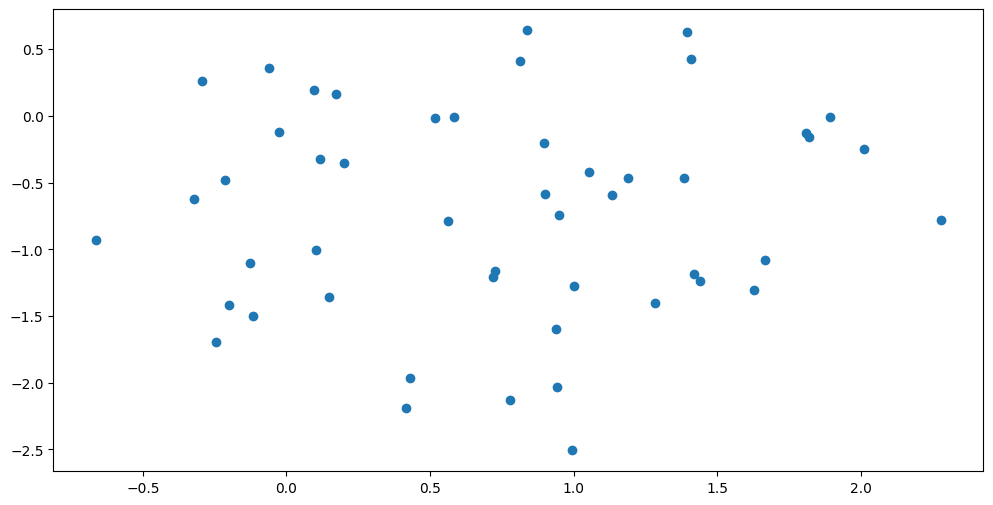

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_reduced_embeddings[:,0],x_new_reduced_embeddings[:,1],marker='o')

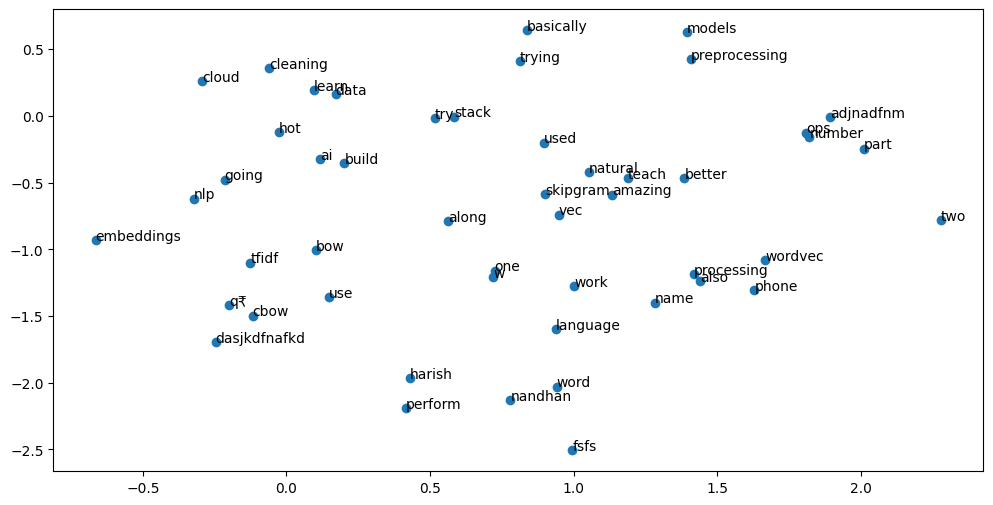

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_reduced_embeddings[:,0],x_new_reduced_embeddings[:,1],marker='o')
for i,words in enumerate(vocab[:len(x_new_reduced_embeddings)]):
  plt.annotate(words,xy=(x_new_reduced_embeddings[i,0],x_new_reduced_embeddings[i,1]))
plt.show()

In [ ]:
# Named Entity Recognition

text = "Barrack Obama was the president of United States"

In [ ]:
word_tokenize(text)

['Barrack', 'Obama', 'was', 'the', 'president', 'of', 'United', 'States']

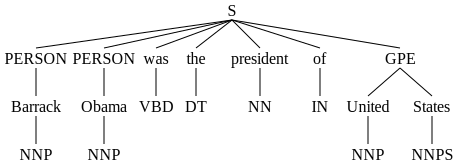

In [ ]:
from nltk import ne_chunk
from nltk import pos_tag
ne_chunk(pos_tag(word_tokenize(text)))

In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
ner_generation = pipeline('ner',model="dbmdz/bert-large-cased-finetuned-conll03-english")

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
!pip install pytorch
!pip install tensorflow

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [ ]:
ner_generation.

[{'entity': 'I-PER',
  'score': 0.9955402,
  'index': 4,
  'word': 'ha',
  'start': 11,
  'end': 13},
 {'entity': 'I-PER',
  'score': 0.9923282,
  'index': 5,
  'word': '##ris',
  'start': 13,
  'end': 16},
 {'entity': 'I-PER',
  'score': 0.99687886,
  'index': 6,
  'word': '##h',
  'start': 16,
  'end': 17},
 {'entity': 'I-PER',
  'score': 0.99183077,
  'index': 7,
  'word': 'na',
  'start': 18,
  'end': 20},
 {'entity': 'I-PER',
  'score': 0.9790238,
  'index': 8,
  'word': '##nd',
  'start': 20,
  'end': 22},
 {'entity': 'I-PER',
  'score': 0.97212,
  'index': 9,
  'word': '##han',
  'start': 22,
  'end': 25},
 {'entity': 'I-ORG',
  'score': 0.85535836,
  'index': 15,
  'word': 'beacon',
  'start': 45,
  'end': 51},
 {'entity': 'I-ORG',
  'score': 0.99483913,
  'index': 16,
  'word': '##A',
  'start': 51,
  'end': 52},
 {'entity': 'I-ORG',
  'score': 0.9905399,
  'index': 17,
  'word': '##I',
  'start': 52,
  'end': 53},
 {'entity': 'I-ORG',
  'score': 0.9992021,
  'index': 21,
  'w